In [34]:
import tensorflow as tf

In [35]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [37]:
# Load Training and Test Data

nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


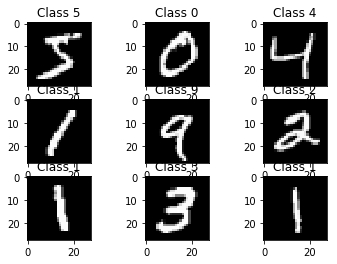

In [38]:
# Look at some data we downloaded
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [39]:
# Formating data for training 
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [40]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [41]:
# Building the model
model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) 
                           
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,   

In [42]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [43]:
#Train the model
model.fit(X_train, Y_train, validation_split=0.05,
                 epochs=5, batch_size=128)

Train on 57000 samples, validate on 3000 samples
Epoch 1/5
57000/57000 [==============================] - 4s 63us/step - loss: 0.2279 - acc: 0.9321 - val_loss: 0.0953 - val_acc: 0.9707
Epoch 2/5
57000/57000 [==============================] - 3s 55us/step - loss: 0.0813 - acc: 0.9746 - val_loss: 0.0731 - val_acc: 0.9787
Epoch 3/5
57000/57000 [==============================] - 3s 55us/step - loss: 0.0512 - acc: 0.9840 - val_loss: 0.0773 - val_acc: 0.9787
Epoch 4/5
57000/57000 [==============================] - 3s 54us/step - loss: 0.0342 - acc: 0.9891 - val_loss: 0.0750 - val_acc: 0.9767
Epoch 5/5
57000/57000 [==============================] - 3s 54us/step - loss: 0.0270 - acc: 0.9914 - val_loss: 0.0760 - val_acc: 0.9773


In [47]:
#Evaluation
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.977


In [45]:
# Inspecting the output
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

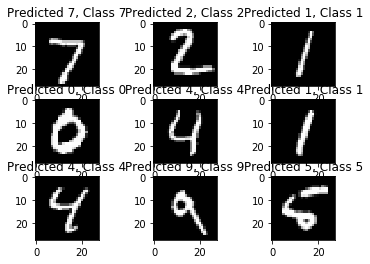

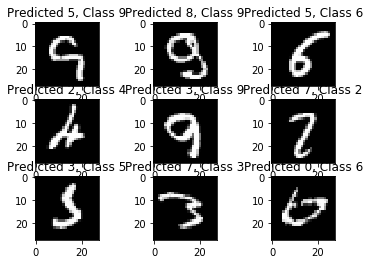

In [46]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))